In [3]:
!pip install yfinance matplotlib pandas #installing libraries


In [4]:
import yfinance as yf

stock_data = yf.download("AAPL", start="2020-01-01", end="2023-01-01") #downloading data for AAPL stock prices

stock_data.head() #shows top few rows

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.796036,72.856628,71.545402,71.799888,135480400
2020-01-03,72.088295,72.851761,71.862892,72.020432,146322800
2020-01-06,72.662712,72.701492,70.954002,71.206070,118387200
2020-01-07,72.320961,72.929306,72.100403,72.672394,108872000
2020-01-08,73.484383,73.787346,72.022887,72.022887,132079200


In [6]:
# Fill missing values
stock_data.ffill(inplace=True)

# Remove extreme outliers in the 'Close' price column (3 standard deviations from the mean)
mean_close = stock_data['Close'].mean()
std_close = stock_data['Close'].std()
stock_data = stock_data[(stock_data['Close'] >= mean_close - 3 * std_close) &
                        (stock_data['Close'] <= mean_close + 3 * std_close)]


In [7]:
# Moving Average
stock_data['MA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()

# Relative Strength Index (RSI)
def calculate_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_data['RSI'] = calculate_rsi(stock_data['Close'], window=14)

# MACD
short_ema = stock_data['Close'].ewm(span=12, adjust=False).mean()
long_ema = stock_data['Close'].ewm(span=26, adjust=False).mean()
stock_data['MACD'] = short_ema - long_ema
stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()


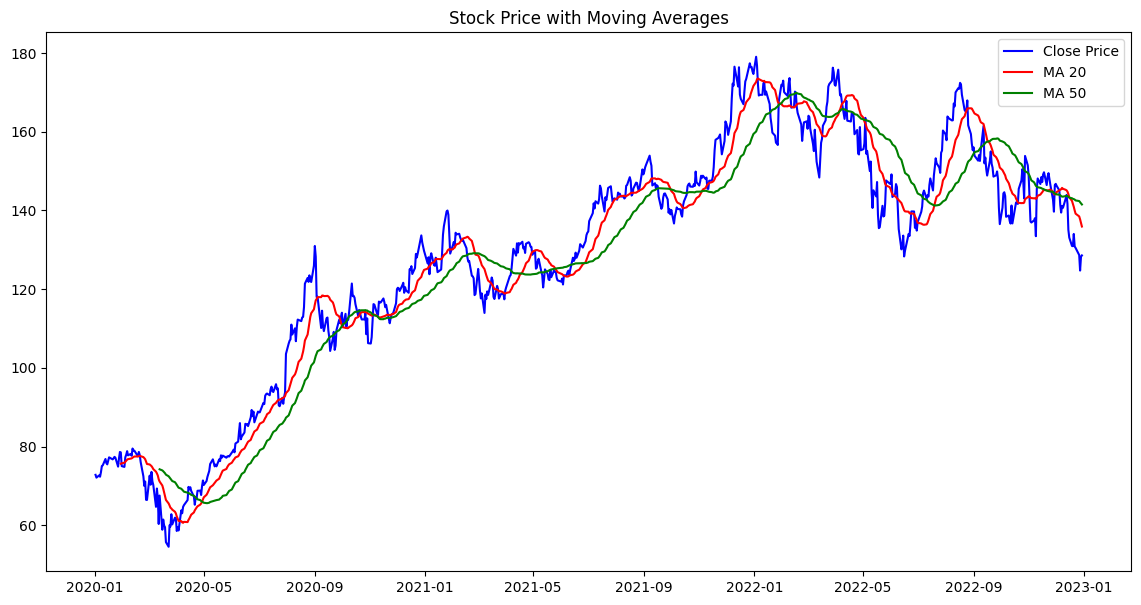

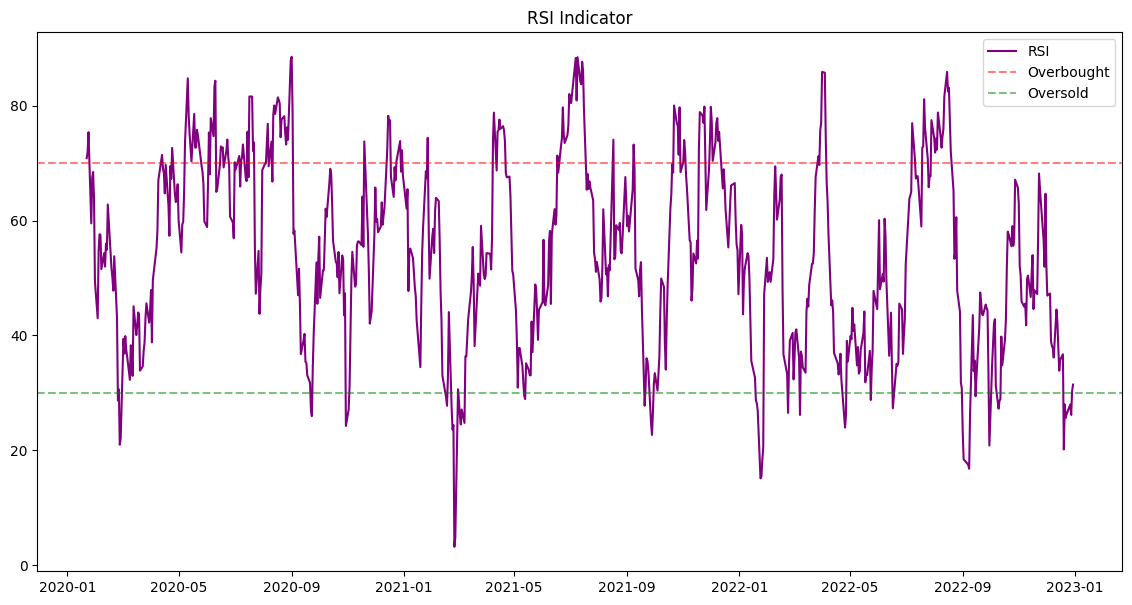

In [8]:
import matplotlib.pyplot as plt

# Plot Close price and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['MA_20'], label='MA 20', color='red')
plt.plot(stock_data['MA_50'], label='MA 50', color='green')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(stock_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought')
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold')
plt.title('RSI Indicator')
plt.legend()
plt.show()


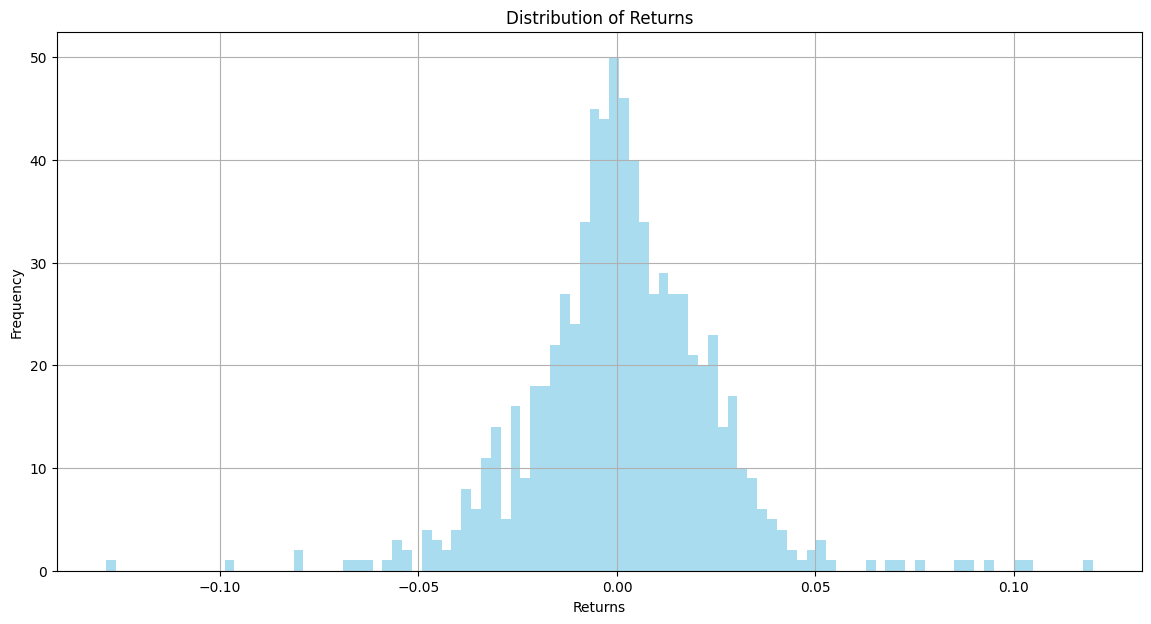

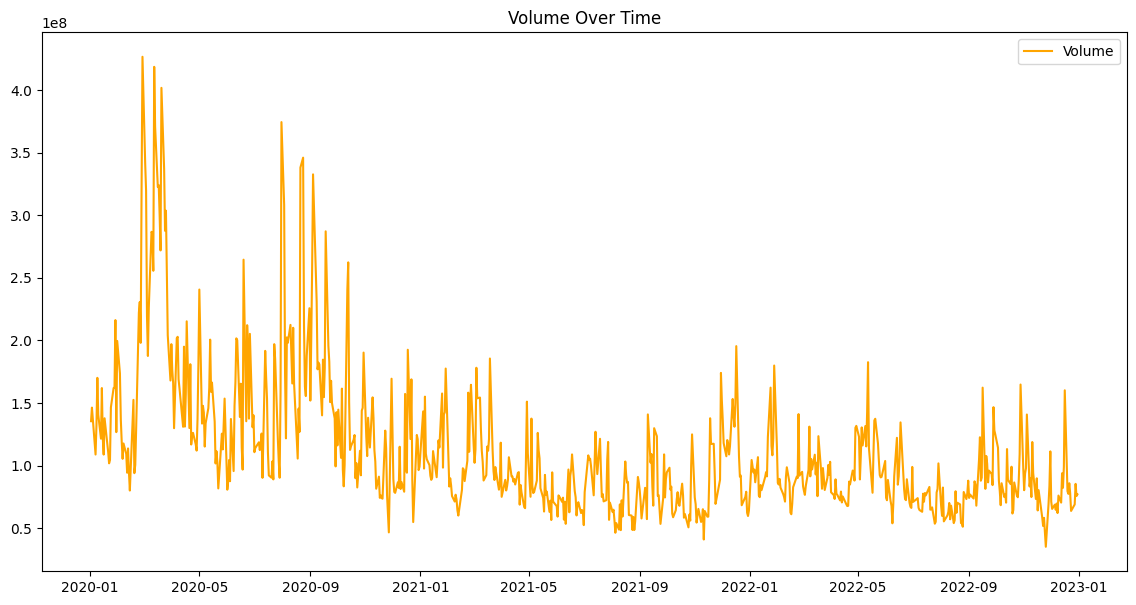

In [9]:
# Calculate returns
stock_data['Returns'] = stock_data['Close'].pct_change()

# Plot distribution of returns
plt.figure(figsize=(14, 7))
stock_data['Returns'].hist(bins=100, color='skyblue', alpha=0.7)
plt.title('Distribution of Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

# Plot volume over time
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Volume'], label='Volume', color='orange')
plt.title('Volume Over Time')
plt.legend()
plt.show()


In [10]:
from google.colab import files

# Save to CSV
stock_data.to_csv('stock_data.csv')
files.download('stock_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>